# Perspective Transformation

- using getPerspectiveTransform function
- using findContours with automate perspective Transform

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [5]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/course_img/scan.jpg"
IMG_PATH   

'../../res/img/course_img/scan.jpg'

---
### Loading data

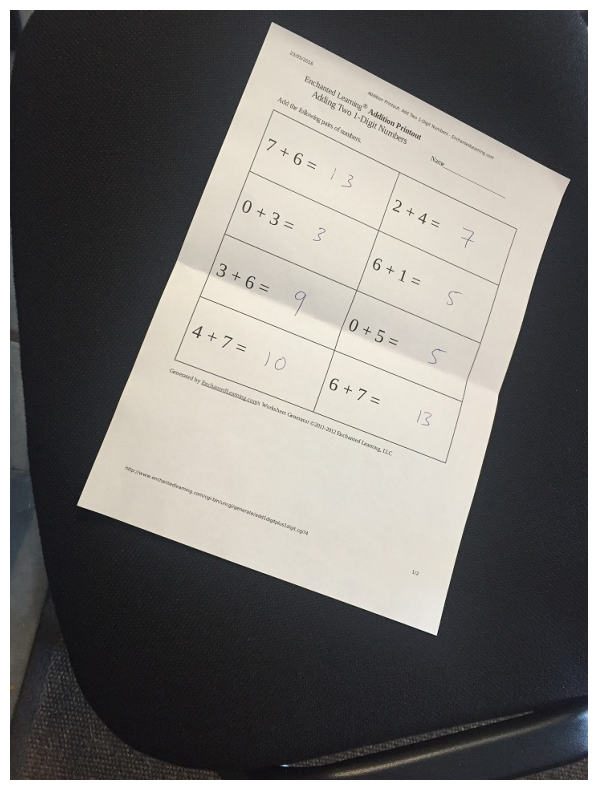

In [7]:
img = cv2.imread(IMG_PATH)
imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

---
### Perspective Transformation

1. Get the border of the object

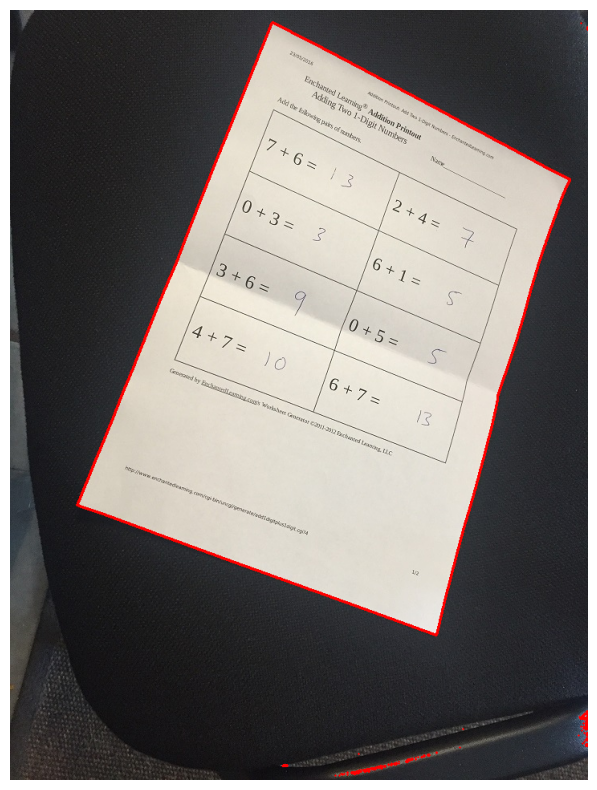

In [8]:
_, b_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(b_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

copy_img = img.copy()
cv2.drawContours(copy_img, contours, -1, (0, 0, 255), thickness=2)
imshow(copy_img)

Corner Points: [[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


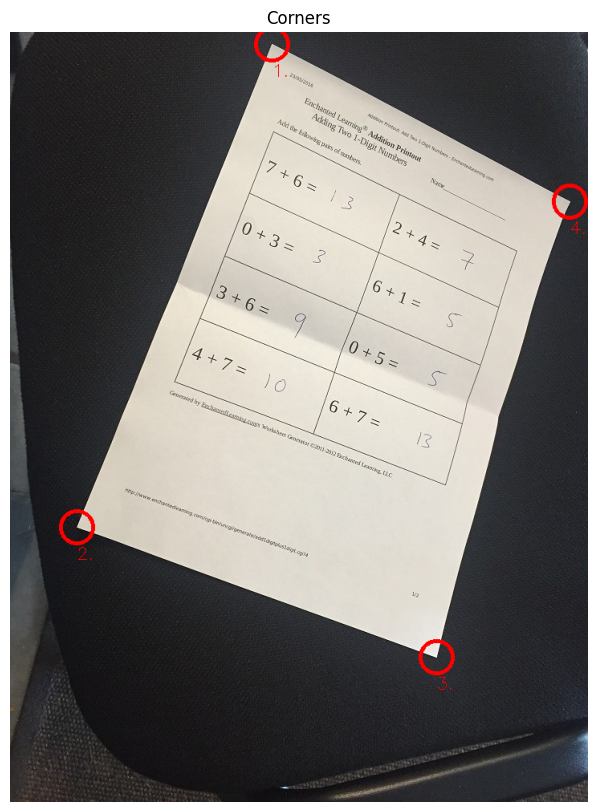

In [15]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for cur_contour in sorted_contours:
    # get approximate corner points
    perimeter = cv2.arcLength(cur_contour, True)
    approx = cv2.approxPolyDP(cur_contour, 0.05*perimeter, True)

    if len(approx) == 4:
        break

print(f"Corner Points: {approx}")

copy_img = img.copy()
for i, pt in enumerate(approx, 1):
    cv2.circle(copy_img, (pt[0]), 20, (0, 0, 255), 3)
    cv2.putText(copy_img, f"{i}.", (pt[0][0], pt[0][1]+40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)
imshow(copy_img, "Corners")

In [21]:
height = np.linalg.norm(approx[1]-approx[0])
height_alt = np.linalg.norm(approx[2]-approx[3])
print(f"Height = {height} ({height_alt})")

width = np.linalg.norm(approx[3]-approx[0])
width_alt = np.linalg.norm(approx[2]-approx[1])
print(f"Width = {width} ({width_alt})")

Height = 649.1941158082072 (591.7600865215564)
Width = 419.59146797807983 (476.39059604488415)


2. Transform perspective

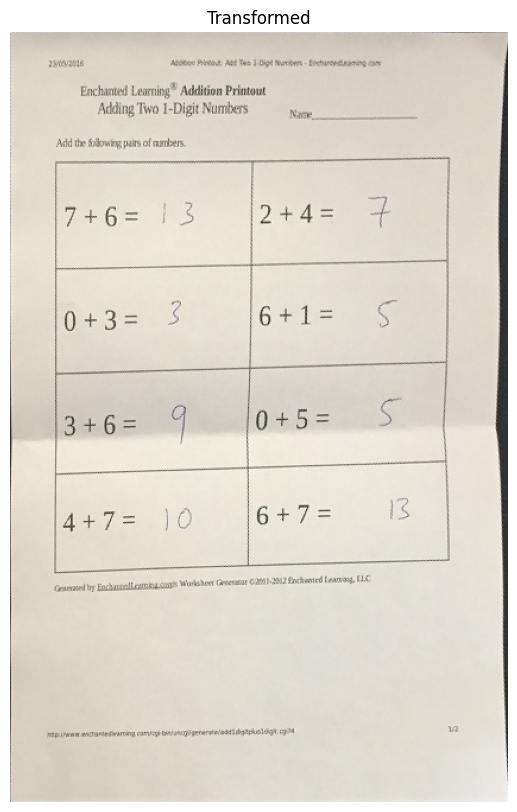

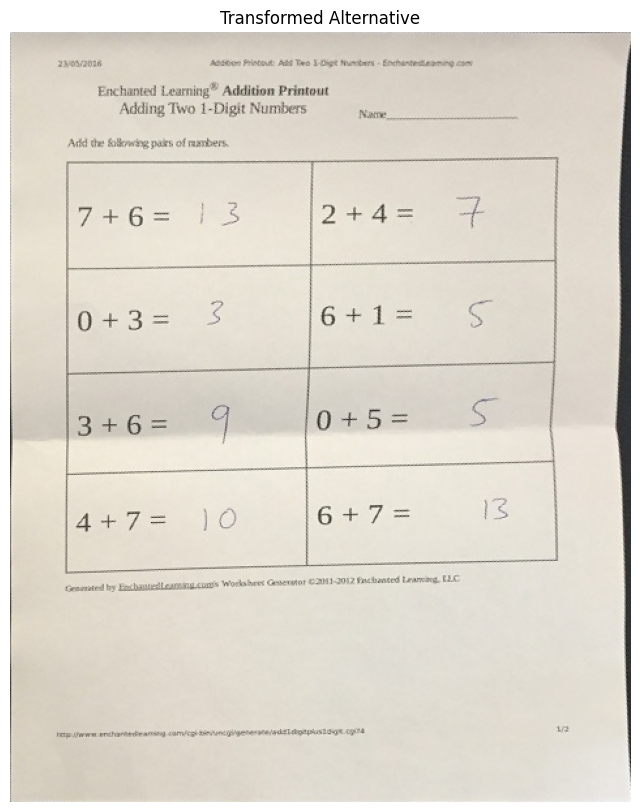

In [25]:
input_pts = np.float32(approx)

output_pts = np.float32([
    [0, 0],
    [0, int(height)],
    [int(width), int(height)],
    [int(width), 0]
])

M = cv2.getPerspectiveTransform(input_pts, output_pts)

transformed_img = cv2.warpPerspective(img, M, (int(width), int(height)))
imshow(transformed_img, "Transformed")

############################################
# use alt sizes
output_pts = np.float32([
    [0, 0],
    [0, int(height_alt)],
    [int(width_alt), int(height_alt)],
    [int(width_alt), 0]
])

M = cv2.getPerspectiveTransform(input_pts, output_pts)

transformed_img = cv2.warpPerspective(img, M, (int(width_alt), int(height_alt)))
imshow(transformed_img, "Transformed Alternative")

> The ratio can be changed (width and height)

---